In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display the first few rows
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [2]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42
)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize k-NN with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [4]:
from sklearn.metrics import accuracy_score

# Predict using k-NN
predictions = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy with k=3:", accuracy)

Accuracy with k=3: 1.0


In [5]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy with k={k}:", accuracy)

Accuracy with k=1: 1.0
Accuracy with k=2: 1.0
Accuracy with k=3: 1.0
Accuracy with k=4: 1.0
Accuracy with k=5: 1.0
Accuracy with k=6: 1.0
Accuracy with k=7: 0.9666666666666667
Accuracy with k=8: 1.0
Accuracy with k=9: 1.0
Accuracy with k=10: 1.0


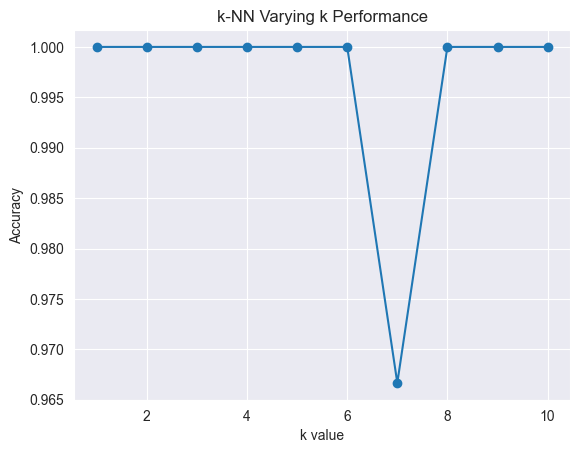

In [6]:
import matplotlib.pyplot as plt

accuracies = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('k-NN Varying k Performance')
plt.show()